In [1]:
import os
import numpy as np
import gdown
import zipfile
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR -O /content/drive/MyDrive/DS102_Lab5/VinaFood21.zip

Downloading...
From: https://drive.google.com/uc?id=1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR
To: /content/drive/MyDrive/DS102_Lab5/VinaFood21.zip
100% 2.71G/2.71G [00:51<00:00, 52.8MB/s]


In [ ]:
!unzip -qq /content/drive/MyDrive/DS102_Lab5/VinaFood21.zip -d /content/drive/MyDrive/DS102_Lab5/Unzipped

In [3]:
train_dir = "/content/drive/MyDrive/DS102_Lab5/Unzipped/VinaFood21/train"
test_dir = "/content/drive/MyDrive/DS102_Lab5/Unzipped/VinaFood21/test"

In [4]:
c = []
l = []
print("===== Train set =====")
for folder in os.listdir(train_dir):
        folder_path = os.path.join(train_dir, folder)
        image_count = len([f for f in os.listdir(folder_path)])
        c.append(folder)
        l.append(image_count)
        print(f"{folder}: {image_count} images")

===== Train set =====
banh-can: 363 images
banh-hoi: 910 images
banh-mi-chao: 434 images
banh-tet: 548 images
banh-trang-tron: 465 images
banh-uot: 841 images
bap-nuong: 215 images
bo-kho: 509 images
bo-la-lot: 689 images
bot-chien: 415 images
canh-khoai-mo: 296 images
canh-kho-qua: 436 images
ca-ri: 258 images
ga-nuong: 560 images
goi-ga: 436 images
ha-cao: 720 images
hoanh-thanh-nuoc: 361 images
pha-lau: 530 images
tau-hu: 304 images
thit-kho-trung: 488 images
banh-u: 266 images


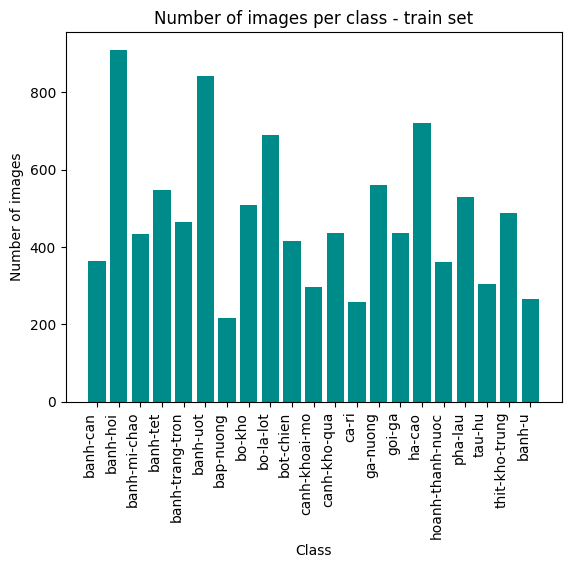

In [5]:
# Vẽ biểu đồ cột
plt.bar(c, l, color='darkcyan')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class - train set')
plt.xticks(rotation=90, ha='right')
plt.show()

In [6]:
c = []
l = []
print("===== Test set =====")
for folder in os.listdir(test_dir):
        folder_path = os.path.join(test_dir, folder)
        image_count = len([f for f in os.listdir(folder_path)])
        c.append(folder)
        l.append(image_count)
        print(f"{folder}: {image_count} images")

===== Test set =====
banh-can: 241 images
banh-hoi: 607 images
banh-mi-chao: 289 images
banh-tet: 364 images
banh-trang-tron: 309 images
banh-u: 176 images
banh-uot: 560 images
bap-nuong: 143 images
bo-kho: 338 images
bo-la-lot: 458 images
bot-chien: 276 images
canh-khoai-mo: 198 images
canh-kho-qua: 290 images
ca-ri: 171 images
ga-nuong: 372 images
goi-ga: 290 images
ha-cao: 480 images
hoanh-thanh-nuoc: 240 images
pha-lau: 352 images
tau-hu: 203 images
thit-kho-trung: 325 images


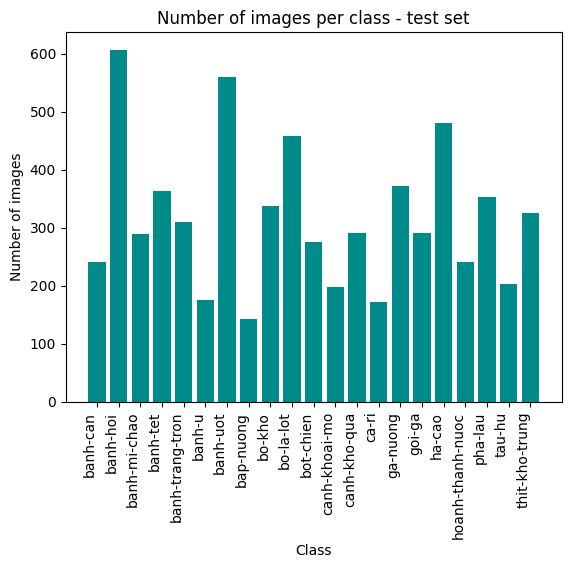

In [7]:
# Vẽ biểu đồ cột
plt.bar(c, l, color='darkcyan')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class - test set')
plt.xticks(rotation=90, ha='right')
plt.show()

Label: banh-can


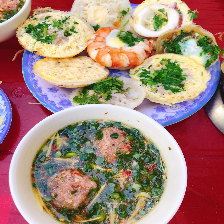



Label: banh-hoi


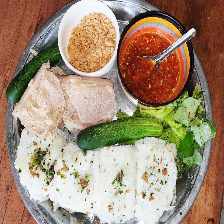



Label: banh-mi-chao


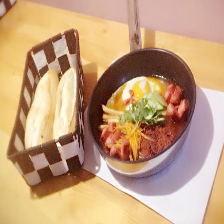



Label: banh-tet


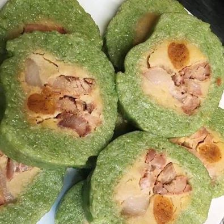



Label: banh-trang-tron


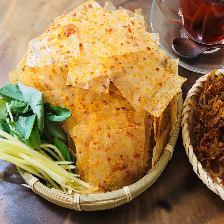



Label: banh-uot


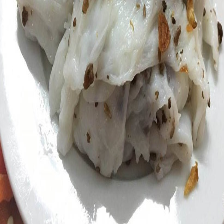



Label: bap-nuong


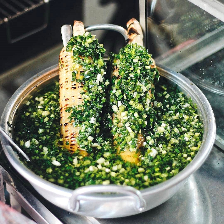



Label: bo-kho


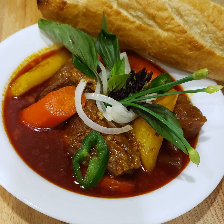



Label: bo-la-lot


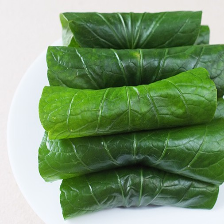



Label: bot-chien


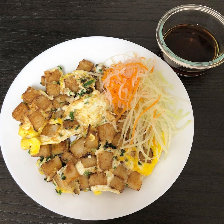



Label: canh-khoai-mo


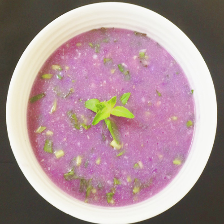



Label: canh-kho-qua


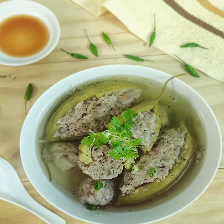



Label: ca-ri


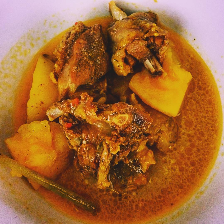



Label: ga-nuong


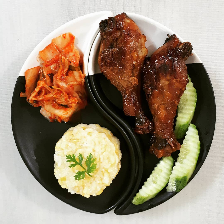



Label: goi-ga


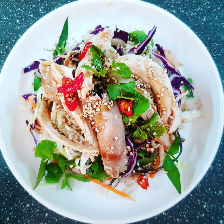



Label: ha-cao


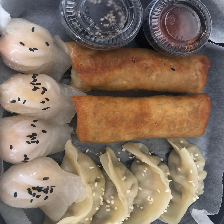



Label: hoanh-thanh-nuoc


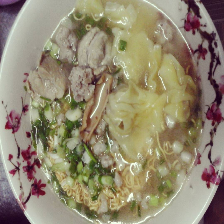



Label: pha-lau


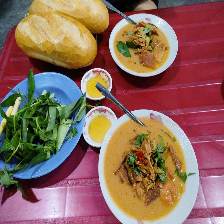



Label: tau-hu


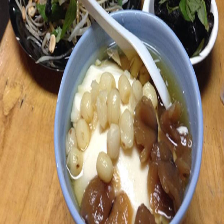



Label: thit-kho-trung


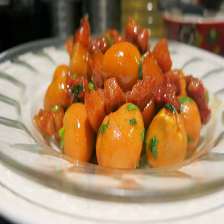



Label: banh-u


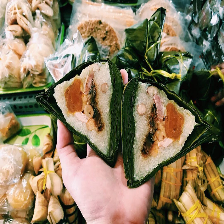

In [ ]:
# Trong tập train in mỗi lớp một ảnh đại diện
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)

    img_name = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, img_name)

    img = cv.imread(img_path)
    img = cv.resize(img, (224, 224))
    print("Label:", folder)

    cv2_imshow(img)
    print("\n")

In [8]:
def read_data(data_dir):
    data = []
    labels = []

    # Lặp qua các thư mục con trong thư mục dữ liệu
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            img = cv.imread(img_path)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Chuyển ảnh sang ảnh xám
            img = cv.resize(img, (128, 128))  # Resize tất cả ảnh về kích thước 128x128

            img = (img - img.mean()) / img.std()
            img = img.flatten()

            data.append(img)
            labels.append(folder)

    data = np.asarray(data)
    labels = np.asarray(labels)

    return data, labels

In [9]:
X_train, y_train = read_data(train_dir)
X_test, y_test = read_data(test_dir)

In [10]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [11]:
print(X_train.shape)

(10044, 16384)


In [12]:
print(X_test.shape)

(6682, 16384)


In [16]:
y_train

array([0, 0, 0, ..., 5, 5, 5])

#Bài 1: Sử dụng Sklearn xây dựng phương pháp Softmax Regression

In [ ]:
sm_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)
sm_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
sm_y_pred = sm_model.predict(X_test)

In [ ]:
sm_acc = accuracy_score(y_test, sm_y_pred)
print("Accuracy =", sm_acc)

Accuracy = 0.2746183777312182


#Bài 2: Sử dụng Sklearn xây dựng phương pháp SVM

In [ ]:
svm_model = SVC(C=1, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [ ]:
svm_y_pred = svm_model.predict(X_test)

In [ ]:
svm_acc = accuracy_score(y_test, svm_y_pred)
print("Accuracy =", svm_acc)

Accuracy = 0.25321759952110146


#Bài 3: Tiền xử lý tất cả hình ảnh sử dụng PCA, sau đó tiến hành huấn luyện phương pháp SVM trên hình ảnh đã được xử lý

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X_train)

PCA()

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print("Number of components for 99% variance:", num)

Number of components for 99% variance: 5412


In [ ]:
pca = PCA(n_components = num)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca

array([[ 1.97572703e+01, -2.47662868e+01, -1.15463065e+01, ...,
         5.97582833e-01, -2.68093511e-01, -8.60291503e-02],
       [-4.40685325e+01,  1.53475150e+01, -2.21122690e+01, ...,
        -7.15153347e-01,  1.51306318e-01, -4.61301201e-01],
       [-3.63863965e+01,  1.23917843e+01, -6.86023250e+00, ...,
         4.20346610e-01, -1.15195144e-01,  1.12372874e-01],
       ...,
       [ 3.65188786e+01, -3.34869641e+01,  7.17666267e+00, ...,
         7.11963556e-02, -1.97204281e-02, -2.04342149e-01],
       [-4.27808842e+01, -1.69022140e+00,  1.69975486e+01, ...,
        -2.22396760e-01,  3.47602043e-01, -4.30798525e-01],
       [ 4.39442904e-01, -6.39914990e+00, -2.12326102e+01, ...,
         3.23365741e-01, -1.32722335e-01,  2.70122671e-01]])

In [ ]:
svm_model_pca = SVC(C=10, gamma='scale')
svm_model_pca.fit(X_train_pca, y_train)

SVC(C=10)

In [ ]:
y_pred_pca = svm_model_pca.predict(X_test_pca)

In [ ]:
pca_svm_acc = accuracy_score(y_test, y_pred_pca)
print("Accuracy =", pca_svm_acc)

Accuracy = 0.31218198144268183
